In [32]:
from fastai.tabular.all import *

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [33]:
raw_data_path = '../data/raw_office_dialog.csv'
df = pd.read_csv(raw_data_path, encoding='unicode-escape')

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,"It all seems so very arbitrary. I applied for a job at this company because they were hiring. I took a desk at the back because it was empty. But'[chuckles] no matter how you get there or where you end up, human beings have this miraculous gift to make that place home. [standing with two cops] Let's do this.",Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks they're the only one to take a dump in a paper shredder. You're not alone sister. Let's get a beer sometime.,Meredith,False
59906,59907,9,23,114,I'm happy that this was all filmed so I can remember everyone and what we did. I worked for a paper company all these years and I never wrote anything down.,Phyllis,False
59907,59908,9,23,115,"I sold paper at this company for 12 years. My job was to speak to clients on the phone about quantities and types of copier paper. Even if I didn't love every minute of it, everything I have, I owe to this job. This stupid,wonderful,boring,amazing job.",Jim,False


In [34]:
speakers = df['speaker'].unique()


array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Todd Packer', 'Phyllis',
       'Stanley', 'Oscar', 'Angela', 'Kevin', 'Ryan', 'Man', 'Roy',
       'Documentary Crew Member', 'Mr. Brown', 'Toby', 'Kelly',
       'Meredith', 'Travel Agent', 'Man on Phone', 'Everybody', 'Lonny',
       'Darryl', 'Teammates', 'Michael and Dwight', 'Warehouse worker',
       'Madge', 'Worker', 'Packer', 'Warehouse Worker', 'Katy',
       'Guy at bar', 'Other Guy at Bar', 'Guy At Bar', 'Pam and Jim',
       'Employee', "Chili's Employee", 'Waitress', 'Manager',
       "Kevin's computer", 'Warehouse Guy', 'Warehouse guy',
       'Warehouse guys', 'Video', 'Man in Video', 'Actor',
       'Redheaded Actress', "Mr. O'Malley", 'Albiny', "Pam's Mom",
       'Carol', 'Bill', 'Everyone', 'Crowd', 'song', 'Song',
       'Dwight and Michael', 'Sherri', 'Creed', 'Devon', 'Children',
       'Kid', 'Vance Refrigeration Worker #1',
       'Vance Refrigeration Worker #2', 'Hank the Security Guard', 'Ira',
       "Ryan's

In [35]:
len(df['speaker'].unique())

784

In [36]:
df['speaker'].value_counts()

Michael               12145
Dwight                 7532
Jim                    6814
Pam                    5375
Andy                   3969
                      ...  
Michael and Erin          1
Deliveryman               1
Zion                      1
Fourth Shareholder        1
Carol Stills              1
Name: speaker, Length: 784, dtype: int64

In [37]:
df_freq_by_speaker = df['speaker'].value_counts().to_frame()

,speaker
Michael,12145
Dwight,7532
Jim,6814
Pam,5375
Andy,3969
...,...
Michael and Erin,1
Deliveryman,1
Zion,1
Fourth Shareholder,1


In [38]:
df_freq_by_speaker = df['speaker'].value_counts().to_frame().style.bar()

,speaker
Michael,12145
Dwight,7532
Jim,6814
Pam,5375
Andy,3969
Kevin,1709
Angela,1695
Oscar,1491
Erin,1469
Ryan,1379


<Axes: >

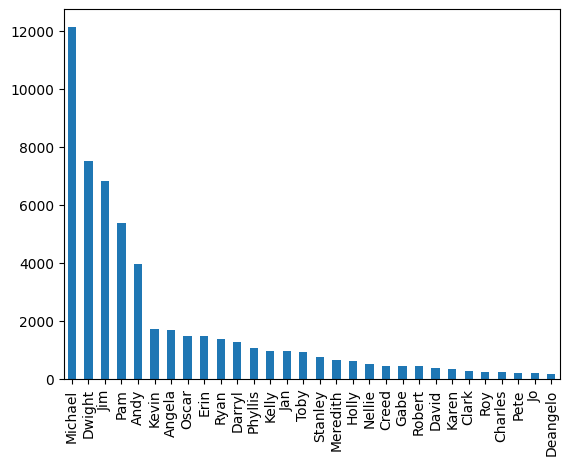

In [39]:
df['speaker'].value_counts().head(30).plot(kind='bar')

Now that we know there are 784 'speakers', and we have an idea of the frequency of each speaker, it could be useful to generate a few different datasets. 

Ideas:
1. Take top 30 speakers by value_counts arbitrarily (# lines really taper off)
2. Take only individuals, drop groups
3. Take top 10% speakers?

In [40]:
df['speaker'].value_counts().describe()

count      784.000000
mean        76.414541
std        630.450061
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max      12145.000000
Name: speaker, dtype: float64

In [41]:
# df['speaker'].value_counts().quantile([0, .1], axis=1)
df_speaker_freq = df['speaker'].value_counts().to_frame().reset_index()
df_speaker_freq.columns = ['speaker', 'num_lines']

In [42]:
speakers_95th_percentile_df = df_speaker_freq[df_speaker_freq.num_lines > df_speaker_freq.num_lines.quantile(.95)]

,speaker,num_lines
0,Michael,12145
1,Dwight,7532
2,Jim,6814
3,Pam,5375
4,Andy,3969
...,...,...
35,Todd Packer,74
36,Val,73
37,Danny,68
38,Josh,64


In [43]:
speakers_21_df = df_speaker_freq[df_speaker_freq.num_lines > df_speaker_freq.num_lines.quantile(.9741)]

,speaker,num_lines
0,Michael,12145
1,Dwight,7532
2,Jim,6814
3,Pam,5375
4,Andy,3969
...,...,...
16,Meredith,645
17,Holly,609
18,Nellie,529
19,Creed,456


In [44]:
from pathlib import Path
speakers_95th_percentile_path = Path('../data/speakers_95th_percentile.csv')

if not speakers_95th_percentile_path.is_file():
    speakers_95th_percentile_df.to_csv(speakers_95th_percentile_path, encoding='utf-8')

In [45]:
speakers_top_21_path = Path('../data/speakers_top_21.csv')

if not speakers_top_21_path.is_file():
    speakers_21_df.to_csv(speakers_top_21_path, encoding='utf-8')

Text(0, 0.5, 'Number of Lines')

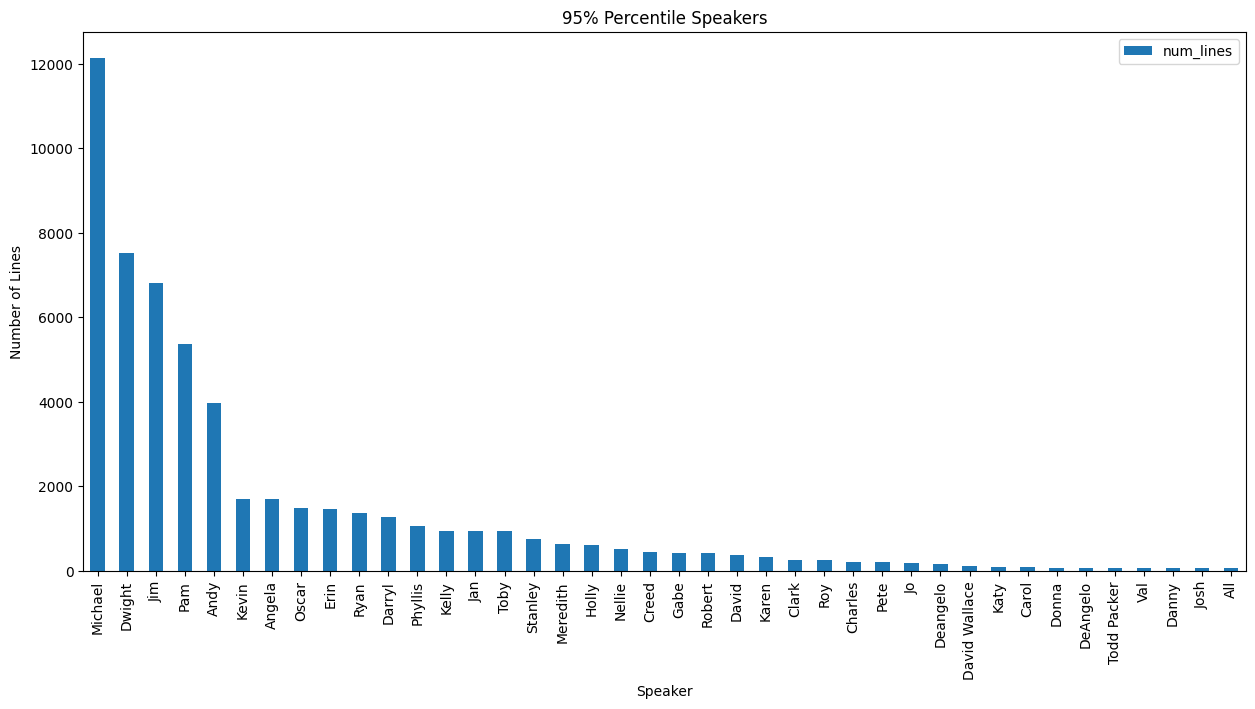

In [46]:
ax = speakers_95th_percentile_df.plot(x='speaker', y='num_lines', kind='bar', figsize = (15, 7))
ax.set_title('95% Percentile Speakers')
ax.set_xlabel('Speaker')
ax.set_ylabel('Number of Lines')

In [47]:
unique_speakers_95th_percentile = set(speakers_95th_percentile_df['speaker'])

{'All',
 'Andy',
 'Angela',
 'Carol',
 'Charles',
 'Clark',
 'Creed',
 'Danny',
 'Darryl',
 'David',
 'David Wallace',
 'DeAngelo',
 'Deangelo',
 'Donna',
 'Dwight',
 'Erin',
 'Gabe',
 'Holly',
 'Jan',
 'Jim',
 'Jo',
 'Josh',
 'Karen',
 'Katy',
 'Kelly',
 'Kevin',
 'Meredith',
 'Michael',
 'Nellie',
 'Oscar',
 'Pam',
 'Pete',
 'Phyllis',
 'Robert',
 'Roy',
 'Ryan',
 'Stanley',
 'Toby',
 'Todd Packer',
 'Val'}

In [48]:
top_21_speakers = set(speakers_21_df['speaker'])

{'Andy',
 'Angela',
 'Creed',
 'Darryl',
 'Dwight',
 'Erin',
 'Gabe',
 'Holly',
 'Jan',
 'Jim',
 'Kelly',
 'Kevin',
 'Meredith',
 'Michael',
 'Nellie',
 'Oscar',
 'Pam',
 'Phyllis',
 'Ryan',
 'Stanley',
 'Toby'}

In [49]:
filted_by_linecount_df = df.query('speaker in @unique_speakers_95th_percentile')

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,"It all seems so very arbitrary. I applied for a job at this company because they were hiring. I took a desk at the back because it was empty. But'[chuckles] no matter how you get there or where you end up, human beings have this miraculous gift to make that place home. [standing with two cops] Let's do this.",Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks they're the only one to take a dump in a paper shredder. You're not alone sister. Let's get a beer sometime.,Meredith,False
59906,59907,9,23,114,I'm happy that this was all filmed so I can remember everyone and what we did. I worked for a paper company all these years and I never wrote anything down.,Phyllis,False
59907,59908,9,23,115,"I sold paper at this company for 12 years. My job was to speak to clients on the phone about quantities and types of copier paper. Even if I didn't love every minute of it, everything I have, I owe to this job. This stupid,wonderful,boring,amazing job.",Jim,False


In [50]:
filtered_top_21_df = df.query('speaker in @top_21_speakers')

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,"It all seems so very arbitrary. I applied for a job at this company because they were hiring. I took a desk at the back because it was empty. But'[chuckles] no matter how you get there or where you end up, human beings have this miraculous gift to make that place home. [standing with two cops] Let's do this.",Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks they're the only one to take a dump in a paper shredder. You're not alone sister. Let's get a beer sometime.,Meredith,False
59906,59907,9,23,114,I'm happy that this was all filmed so I can remember everyone and what we did. I worked for a paper company all these years and I never wrote anything down.,Phyllis,False
59907,59908,9,23,115,"I sold paper at this company for 12 years. My job was to speak to clients on the phone about quantities and types of copier paper. Even if I didn't love every minute of it, everything I have, I owe to this job. This stupid,wonderful,boring,amazing job.",Jim,False


In [51]:
len(df) - len(filted_by_linecount_df)

4436

In [52]:
filted_by_linecount_df.reset_index()

,index,id,season,episode,scene,line_text,speaker,deleted
0,0,1,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False
1,1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,2,3,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False
3,3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...,...
55468,59904,59905,9,23,112,"It all seems so very arbitrary. I applied for a job at this company because they were hiring. I took a desk at the back because it was empty. But'[chuckles] no matter how you get there or where you end up, human beings have this miraculous gift to make that place home. [standing with two cops] Let's do this.",Creed,False
55469,59905,59906,9,23,113,I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks they're the only one to take a dump in a paper shredder. You're not alone sister. Let's get a beer sometime.,Meredith,False
55470,59906,59907,9,23,114,I'm happy that this was all filmed so I can remember everyone and what we did. I worked for a paper company all these years and I never wrote anything down.,Phyllis,False
55471,59907,59908,9,23,115,"I sold paper at this company for 12 years. My job was to speak to clients on the phone about quantities and types of copier paper. Even if I didn't love every minute of it, everything I have, I owe to this job. This stupid,wonderful,boring,amazing job.",Jim,False


In [53]:
filtered_top_21_df.reset_index()

,index,id,season,episode,scene,line_text,speaker,deleted
0,0,1,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False
1,1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,2,3,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False
3,3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...,...
52202,59904,59905,9,23,112,"It all seems so very arbitrary. I applied for a job at this company because they were hiring. I took a desk at the back because it was empty. But'[chuckles] no matter how you get there or where you end up, human beings have this miraculous gift to make that place home. [standing with two cops] Let's do this.",Creed,False
52203,59905,59906,9,23,113,I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks they're the only one to take a dump in a paper shredder. You're not alone sister. Let's get a beer sometime.,Meredith,False
52204,59906,59907,9,23,114,I'm happy that this was all filmed so I can remember everyone and what we did. I worked for a paper company all these years and I never wrote anything down.,Phyllis,False
52205,59907,59908,9,23,115,"I sold paper at this company for 12 years. My job was to speak to clients on the phone about quantities and types of copier paper. Even if I didn't love every minute of it, everything I have, I owe to this job. This stupid,wonderful,boring,amazing job.",Jim,False


In [54]:
del filted_by_linecount_df['id']
filted_by_linecount_df

,season,episode,scene,line_text,speaker,deleted
0,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False
3,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...
59904,9,23,112,"It all seems so very arbitrary. I applied for a job at this company because they were hiring. I took a desk at the back because it was empty. But'[chuckles] no matter how you get there or where you end up, human beings have this miraculous gift to make that place home. [standing with two cops] Let's do this.",Creed,False
59905,9,23,113,I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks they're the only one to take a dump in a paper shredder. You're not alone sister. Let's get a beer sometime.,Meredith,False
59906,9,23,114,I'm happy that this was all filmed so I can remember everyone and what we did. I worked for a paper company all these years and I never wrote anything down.,Phyllis,False
59907,9,23,115,"I sold paper at this company for 12 years. My job was to speak to clients on the phone about quantities and types of copier paper. Even if I didn't love every minute of it, everything I have, I owe to this job. This stupid,wonderful,boring,amazing job.",Jim,False


In [55]:
del filtered_top_21_df['id']
filtered_top_21_df

,season,episode,scene,line_text,speaker,deleted
0,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False
3,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...
59904,9,23,112,"It all seems so very arbitrary. I applied for a job at this company because they were hiring. I took a desk at the back because it was empty. But'[chuckles] no matter how you get there or where you end up, human beings have this miraculous gift to make that place home. [standing with two cops] Let's do this.",Creed,False
59905,9,23,113,I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks they're the only one to take a dump in a paper shredder. You're not alone sister. Let's get a beer sometime.,Meredith,False
59906,9,23,114,I'm happy that this was all filmed so I can remember everyone and what we did. I worked for a paper company all these years and I never wrote anything down.,Phyllis,False
59907,9,23,115,"I sold paper at this company for 12 years. My job was to speak to clients on the phone about quantities and types of copier paper. Even if I didn't love every minute of it, everything I have, I owe to this job. This stupid,wonderful,boring,amazing job.",Jim,False


In [56]:
filtered_file_path = Path('../data/filtered_95th_percentile_dialog.csv')

if not filtered_file_path.is_file():
    filted_by_linecount_df.to_csv(filtered_file_path, index=False, encoding='utf-8')

In [57]:
filtered_top_21_path = Path('../data/filtered_top_21_dialog.csv')

if not filtered_top_21_path.is_file():
    filtered_top_21_df.to_csv(filtered_top_21_path, index=False, encoding='utf-8')